Практична робота №8

Баш Анастасія 
МІТ-31

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

Завдання №1
Попередня Обробка Даних:

Завантажте та розпакуйте набір даних.

In [25]:
# Set the seed
tf.random.set_seed(42)

#доступ до даних
train_folder = "train/"
test_folder = "test/"

#наші класи
my_classes=['chicken_wings', 'fried_rice']

Виконайте необхідну попередню обробку даних (нормалізація, ресайзинг тощо).

In [26]:
img_size = (224, 224)
batch_size = 32

Поділіть дані на тренувальний та тестовий набори.

In [27]:
# Встановлення параметра шенератора даних
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_folder,
                                               batch_size=batch_size,
                                               target_size=img_size,
                                               class_mode="binary",
                                               seed=42,
                                               classes=my_classes)

test_generator = valid_datagen.flow_from_directory(test_folder,
                                               batch_size=batch_size,
                                               target_size=img_size,
                                               class_mode="binary",
                                               seed=42,
                                               classes=my_classes)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Завдання №2
Розробка Моделі CNN:

1. Створіть модель CNN за допомогою TensorFlow.

Ви можете експериментувати з різними архітектурами та гіперпараметрами.

In [28]:
#створення СNN моделі 
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10, 
                               kernel_size=3,  #може бути також (3, 3)
                               activation="relu", 
                               input_shape=(224, 224, 3)),  #перший шар визначає форму введення (висота, ширина, колірні канали)
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(pool_size=2,  #може також бути (2, 2)
                                  padding="valid"),  #може також 'same'
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")  #двійковий вихід активації
])

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#відобразити короткий опис моделі
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 28090)            

Завдання №4 
Тренування та Оцінка Моделі:

Тренуйте модель на тренувальному наборі даних.

In [29]:
#навчання моделі
history = model.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/5
47/47 [==============================] - 65s 1s/step - loss: 0.5360 - accuracy: 0.7240 - val_loss: 0.3892 - val_accuracy: 0.8700
Epoch 2/5
47/47 [==============================] - 68s 1s/step - loss: 0.3850 - accuracy: 0.8500 - val_loss: 0.4427 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.3820 - accuracy: 0.8487 - val_loss: 0.3200 - val_accuracy: 0.8900
Epoch 4/5
47/47 [==============================] - 63s 1s/step - loss: 0.3349 - accuracy: 0.8707 - val_loss: 0.3435 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 66s 1s/step - loss: 0.3164 - accuracy: 0.8747 - val_loss: 0.3011 - val_accuracy: 0.8760


Оцініть ефективність моделі на тестовому наборі.

Запишіть результати точності та інші метрики ефективності.

In [30]:
# Оцінка моделі на тестовому наборі
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

16/16 [==============================] - 3s 206ms/step - loss: 0.3011 - accuracy: 0.8760
Test Accuracy: 0.8759999871253967


Завдання №5 
Аналіз Результатів:

Проаналізуйте отримані результати.

Оцініть, наскільки ефективно модель розрізняє між обраними класами.

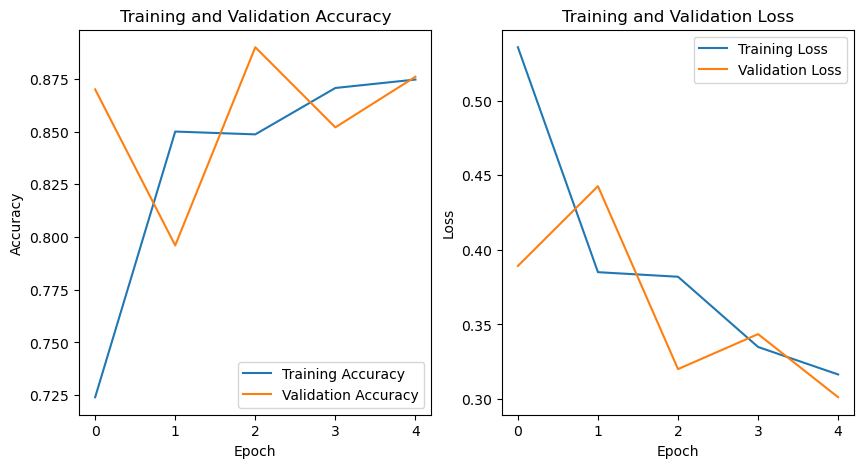

In [31]:
# Аналіз результатів та візуалізація
# Виведення результатів тренування
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Візуалізація точності на тренувальному та валідаційному наборах
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Візуалізація втрат на тренувальному та валідаційному наборах
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()